Import dependencies

In [1]:
from dotenv import load_dotenv
from pathlib import Path
import os
import csv
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import constants


Load .env file

In [2]:
dotenv_path = Path('../../.env')
load_dotenv(dotenv_path=dotenv_path)

True

Read from .env file

In [3]:
DATASET_IMAGE_PATH = os.getenv('DATASET_IMAGE_PATH')

print(DATASET_IMAGE_PATH)

/Users/phuc1403/Downloads/untitled folder


Generate custom-dataset.csv

In [4]:
csv_file = "./custom-dataset.csv"

labels = ["open", "close"]

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["state", "image"])

    # Lặp qua từng nhãn
    for label in labels:
        folder_path = os.path.join(DATASET_IMAGE_PATH, label)

        # Lặp qua tất cả các file trong thư mục
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
                img_path = os.path.join(folder_path, filename)

                # Đọc ảnh từ file
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh dưới dạng ảnh xám

                # Chuyển đổi ma trận ảnh thành một chuỗi của các giá trị pixel
                img_str = str(img.flatten().tolist())

                # Ghi dữ liệu vào file CSV
                writer.writerow([label, img_str])

Print the first image from custom-dataset.csv

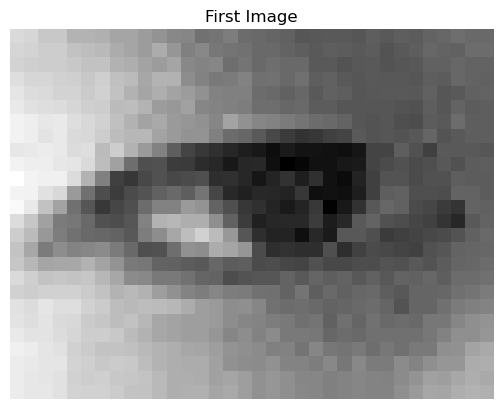

In [5]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Extract the image data of the first image from the CSV file
image_data_str = df.loc[0, 'image']

# Convert the string image data to a NumPy array
image_data = np.array(eval(image_data_str))

# Reshape the NumPy array to the original image dimensions
image = image_data.reshape((constants.image_height, constants.image_width))

# Display the image using Matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('First Image')
plt.show()


Merge custom-dataset.csv with dataset.csv

In [6]:
base_csv_file = "./base-dataset.csv"

# Đọc hai tập dữ liệu CSV vào DataFrame của pandas
df_custom = pd.read_csv(csv_file)
df_base = pd.read_csv(base_csv_file)

# Ghép hai DataFrame lại với nhau
df_combined = pd.concat([df_custom, df_base], ignore_index=True)

# Lưu DataFrame kết quả thành một tập dữ liệu CSV mới
csv_file_combined = "./dataset.csv"
df_combined.to_csv(csv_file_combined, index=False)